### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [2]:
train_x, train_y, test_x, test_y, classes = load_dataset()

b'non-cat'


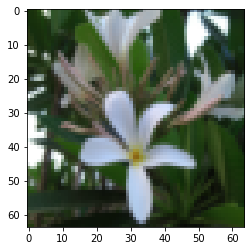

In [3]:
plt.imshow(train_x[9])
print(classes[np.squeeze(train_y[:,9])])

### Shape assertion

In [4]:
m_train = train_x.shape[0]
m_test = test_x.shape[0]

In [5]:
print(train_x.shape, test_x.shape)

(209, 64, 64, 3) (50, 64, 64, 3)


In [6]:
train_x_flatten = train_x.reshape(train_x.shape[1] * train_x.shape[2] * train_x.shape[3], train_x.shape[0])
test_x_flatten = test_x.reshape(test_x.shape[1] * test_x.shape[2] * test_x.shape[3], test_x.shape[0])

In [7]:
print(train_x_flatten.shape, test_x_flatten.shape, train_y.shape, test_y.shape)

(12288, 209) (12288, 50) (1, 209) (1, 50)


In [8]:
train_x = train_x_flatten/255
test_x = test_x_flatten/255

# Modelling

### Initialize model params

In [9]:
w = np.zeros(train_x.shape[0])
b = 0

### Helper functions

In [10]:
def sigmoid(x):
    sig = 1/(1 + np.exp(-x))
    return sig

### Forward propogation

In [11]:
def propogate(w,b,X,Y):
    m = X.shape[1]
    linear_output = np.dot(w.T,X) + b
    output = sigmoid(linear_output)
    cost = np.sum((- Y * np.log(output)) - ((1 - Y) * np.log(1 - output))/m)
    dw = (np.dot(X,(output-Y).T))/m
    db = (np.sum(output-Y))/m
    dw = np.squeeze(dw)
    db = np.squeeze(db)
    grads = {
        'dw': dw,
        'db': db
    }
    return grads,cost

In [12]:
grads,cost = propogate(w,b,train_x,train_y)

In [13]:
def optimise(w, b, X, Y, num_iter = 10000, learning_rate = 0.01):
    costs = []
    for i in range(num_iter):
        grads,cost = propogate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        costs.append(cost)
    
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }
    return params, grads, costs

In [14]:
def predict(w,b,X,Y):
    m = X.shape[1]
    linear_output = np.dot(w.T,X) + b
    output = sigmoid(linear_output)
    print("Accuracy: {} %".format(100 - np.mean(np.abs(output - Y)) * 100))
    return output

In [15]:
params, grads, costs = optimise(w,b,train_x,train_y)

In [16]:
w = params['w']
b = params['b']

In [17]:
print('Testing')
predictions = predict(w,b,test_x,test_y)

Testing
Accuracy: 41.97487343596147 %


In [18]:
print('Training')
predictions = predict(w,b,train_x,train_y)

Training
Accuracy: 81.87322277250107 %


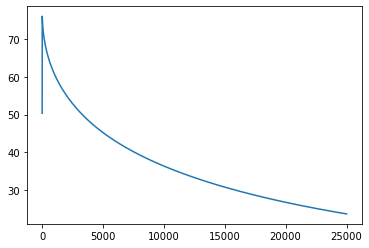

In [19]:
import matplotlib.pyplot as plt
plt.plot(costs)